In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
dataset = pd.read_csv("iris.csv")
print(  dataset.head())
print(len(dataset))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
150


In [3]:
dataset.info() # output shown below


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Split dataset
X=dataset.iloc[:,0:5]
Y=dataset.iloc[:,5]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=0, test_size=0.2)

In [5]:
#feature Scaling
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [6]:
# Fitting of trained data into the model. So we need to built the model first
# defining K value . it should be odd value and (12-1) we are using here
import math
math.sqrt(len(Y_test))

5.477225575051661

In [7]:
# defining the model and initializing the K-NN
Classifier= KNeighborsClassifier(n_neighbors=11,p=2, metric="euclidean")
# Fit the model
Classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [8]:
#predict the test set results
Y_pred= Classifier.predict(X_test)
Y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [9]:
#Evaluate model
cm=np.array(confusion_matrix(Y_test,Y_pred))
print(cm)
#print(f1_score(Y_test,Y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [10]:
#print accuracy
print(accuracy_score(Y_test,Y_pred))

1.0


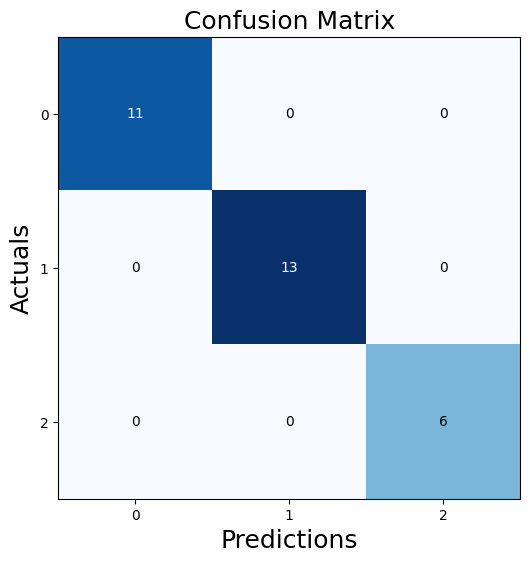

1.0

In [11]:

# Plot non-normalized confusion matrix

#Visualizing confusion matrix for a better view,
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
#Accuracy of our model
acc=accuracy_score(Y_test,Y_pred)
acc

In [12]:
import sklearn.metrics as metrics
print(metrics.classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

